<a href="https://colab.research.google.com/github/anuragduk2024/AIML-LAB/blob/main/Copy_of_Quanvlotional_nural_networkipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Quantum Machine Learning Project**

This project explores the integration of quantum computing with classical machine learning to solve specific tasks. We leverage PennyLane for the quantum aspect and TensorFlow for the classical machine learning part.

In [ ]:
!pip install pennylane pennylane-qiskit tensorflow matplotlib --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 776.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 17.0 

In [ ]:
!pip install --upgrade tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**1. Importing Libraries**

In this section, we import the necessary libraries for both quantum and classical components. PennyLane is used for quantum operations, TensorFlow and Keras are used for machine learning tasks, and other libraries like matplotlib and seaborn are included for data visualization and evaluation.

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

**2. Configuration and Parameters**

Here, we define key parameters such as the number of epochs for training, the number of quantum layers in the neural network, and the number of training and test samples. These parameters help control the training and evaluation process. Additionally, a flag (PREPROCESS) is used to determine whether to preprocess the quantum data or load it from a saved path.

In [ ]:
n_epochs = 10
n_layers = 1
n_train = 100
n_test = 40

SAVE_PATH = "quanvolution/"
PREPROCESS = True           # False --> skip quantum processing and load data from SAVE_PATH
np.random.seed(0)
tf.random.set_seed(0)

**3. Loading and Preprocessing the MNIST Dataset**

In this section, we load the MNIST dataset using TensorFlow's Keras API. The MNIST dataset contains images of handwritten digits, and we perform several preprocessing steps to prepare the data for model training and evaluation:

1. Load the Dataset: We load the training and testing images along with their corresponding labels.

2. Reduce Dataset Size: To speed up the initial experiments, we reduce the dataset size to n_train for training and n_test for testing.
    
3. Normalize Pixel Values: The pixel values of the images are normalized to a range between 0 and 1 by dividing by 255. This helps improve training performance and stability.
    
4. Add Extra Dimension: An extra dimension is added to the image data to match the expected input shape for the model, specifically to account for the channel dimension (for grayscale images, this dimension is 1).

In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension (for convolution channels)
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**4. Quantum Circuit Definition**

In this section, we define the quantum circuit used in the hybrid model. The circuit is created using PennyLane, and it is composed of the following components:

1. Quantum Device Setup: We initialize a quantum device with 4 qubits, using PennyLane's default qubit simulator (default.qubit).

2. Random Circuit Parameters: We generate random parameters for the quantum circuit. These parameters will be used in the quantum layers to introduce variability in the model's learning process.

3. Circuit Encoding: We encode classical input data (represented as phi) into quantum states using the RY rotation gate, which applies a rotation on each qubit based on the corresponding input value.

4. Random Quantum Layers: We apply random quantum layers (using RandomLayers), which are composed of a sequence of quantum gates applied to the qubits. These layers enhance the expressiveness of the quantum circuit.

5. Measurement: Finally, we measure the expectation values of the Pauli-Z operator for each qubit. This gives us classical outputs that can be processed further in the classical part of the model.
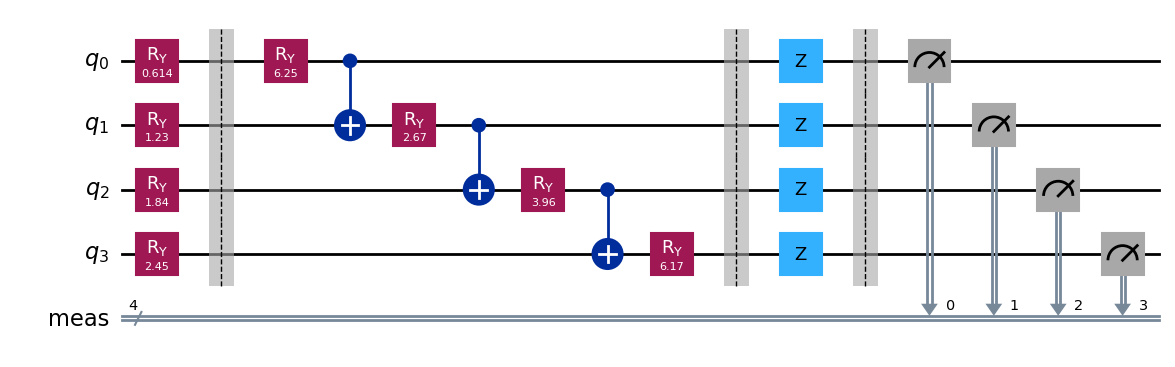
By applying the @qml.qnode(dev) decorator, we convert the function into a quantum node (QNode) that can be executed on the quantum device (dev).

**EXAMPLE FOR QUANTUM ENCODING**

This implementation demonstrates how classical pixel values are encoded into quantum states using RY gates.

1. Image 1: The first image shows a 4-pixel grayscale representation of the pixel values [100, 200, 300, 400]. This visual serves as an example of the classical data before it is processed by the quantum circuit.
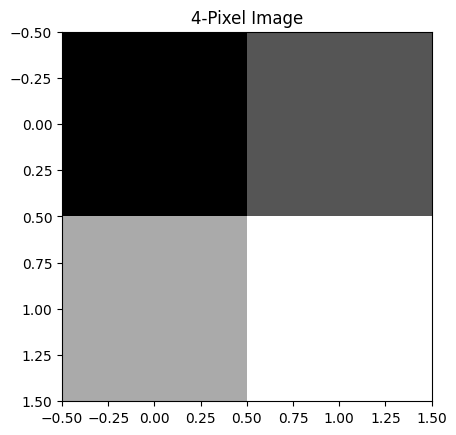

2. Image 2: The second image illustrates the Bloch spheres corresponding to the quantum states of the four qubits. An arrow indicates that as we move from qubit 0 (darker) to qubit 1 (lighter), the color of the Bloch sphere transitions from darker shades to lighter shades. This representation highlights how each classical pixel value is encoded into its respective quantum state.
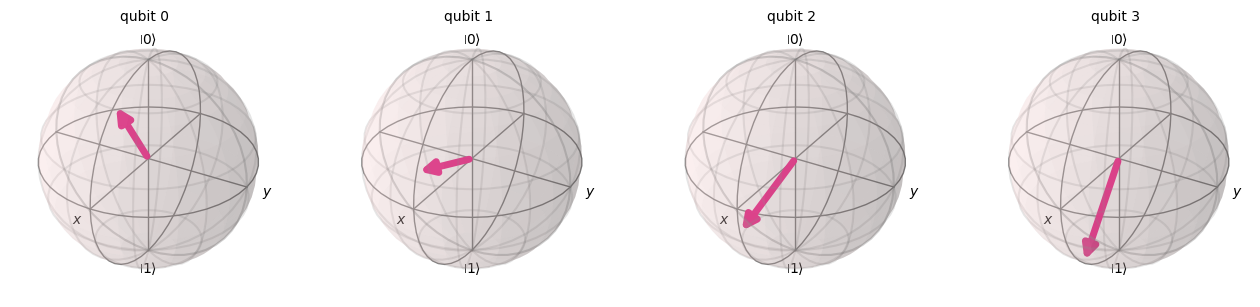

These images together effectively showcase the transition from classical data to quantum states, emphasizing the encoding process in quantum computing.

In [ ]:
dev = qml.device("default.qubit", wires=4)

# Random circuit parameters
rand_params = np.random.uniform(high=2*np.pi, size=(n_layers, 4))

# To convert the function into a QNode running on dev, we apply the qnode() decorator
@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi*phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement (expect. val.) producing 4 classical outputs
    return [qml.expval(qml.PauliZ(j)) for j in range(4)] # Return expectation values

**5. Quantum Convolution Layer (Quanv)**

This section defines a quantum convolution layer, quanv, which applies the quantum circuit to convolve an input image. Instead of traditional convolution with classical filters, this layer uses the quantum circuit (defined earlier) to process local regions of the image and return quantum-enhanced features.

1. Function Description: The quanv function takes a 28x28 grayscale image (represented as a 3D NumPy array with a channel dimension) and applies the quantum circuit multiple times, once for each 2x2 region of the image.

2. Looping Over the Image: The image is divided into 2x2 pixel squares, and for each square, the quantum circuit processes the pixel values. These values are then encoded into quantum states, and the expectation values from the quantum circuit are extracted.

3. Quantum Circuit Application: For each 2x2 region in the image, the quantum circuit processes the pixel values (specifically, the 4 pixels from each 2x2 block), and the expectation values returned by the circuit are assigned to the corresponding pixel in the output array.

4. Output Structure: The output is a 14x14x4 array where each 2x2 block from the input image corresponds to one pixel in the output image, with 4 channels representing the results of the quantum measurements.
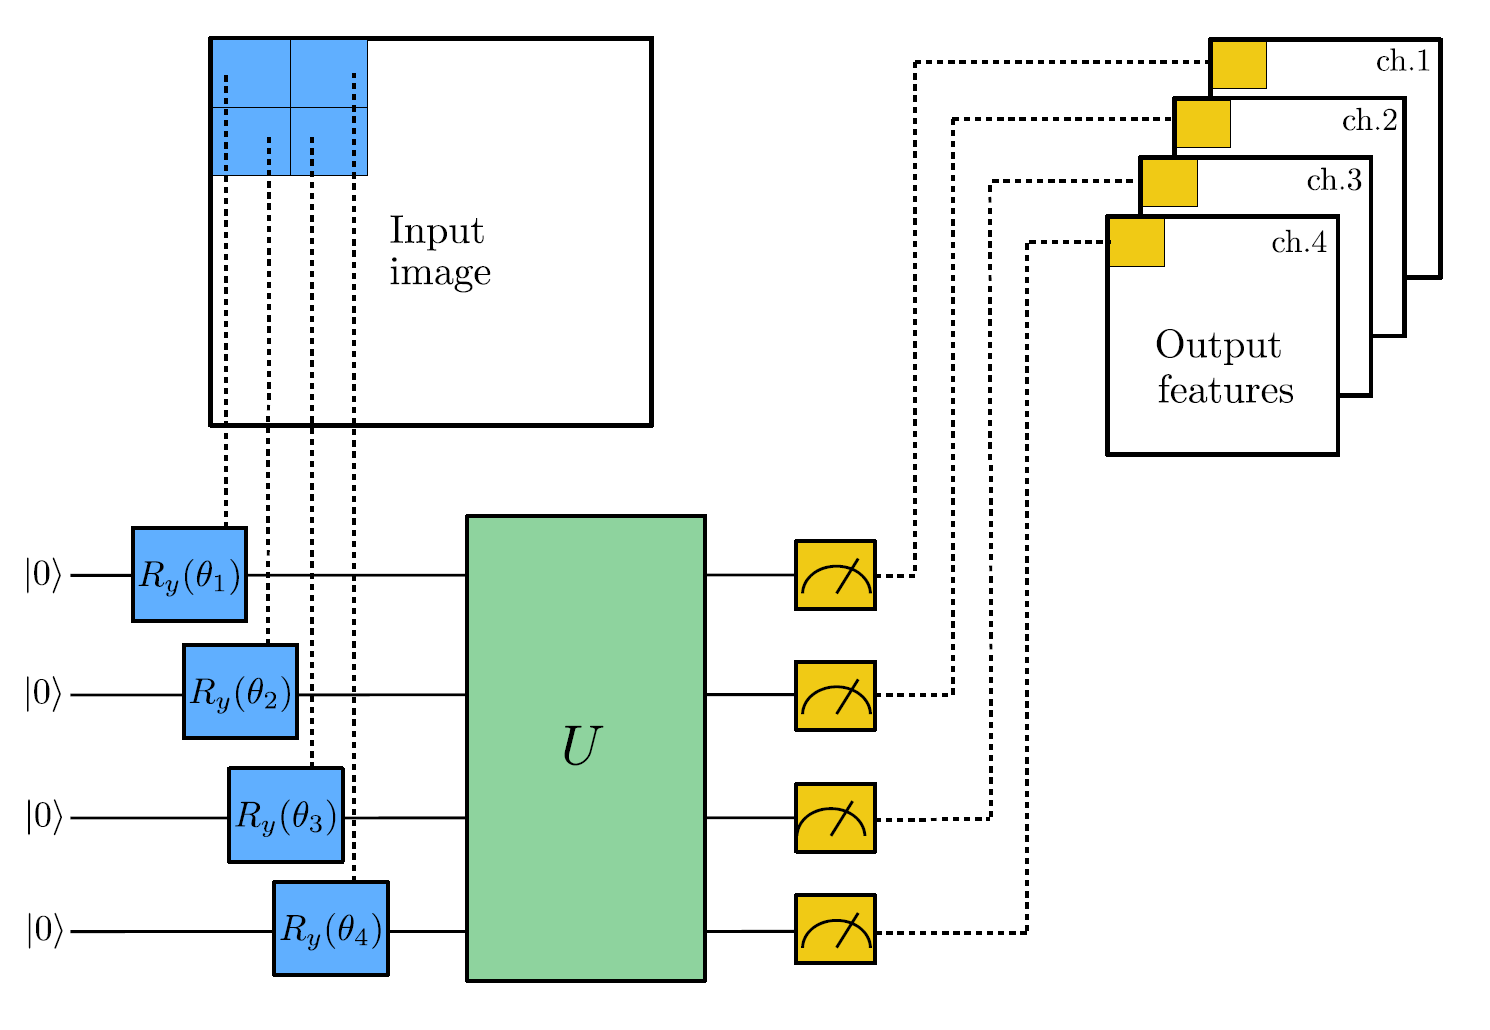

In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit"""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a 2x2 region with the quantum circuit
            q_results = circuit(
                [image[j, k, 0], image[j, k + 1, 0],
                 image[j + 1, k, 0], image[j + 1, k + 1, 0]]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

**6. Quantum Preprocessing of Images**

This section handles the quantum preprocessing of the training and testing images, applying the quanv quantum convolution layer to the images. The preprocessed images are then saved for future use, which helps avoid redundant computations in subsequent runs.

1. Directory Creation: The code checks if the directory specified by SAVE_PATH exists. If not, it creates the directory to store the preprocessed data.

2. Quantum Preprocessing of Training Images: If PREPROCESS is set to True, the training images are processed through the quanv function, which applies the quantum convolution to each image. The processed images are stored in q_train_images.

3. Saving Preprocessed Training Images: After processing all training images, the results are saved as a .npy file to the specified SAVE_PATH. This avoids repeating the quantum preprocessing in the future.

4. Quantum Preprocessing of Test Images: The same process is repeated for the test images, where each image is processed by the quanv function, and the results are saved as q_test_images.npy.

In [ ]:
import os

if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

if PREPROCESS:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print(f"{idx + 1}/{len(train_images)}", end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print(f"{idx + 1}/{len(test_images)}", end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)

Quantum pre-processing of train images:

Quantum pre-processing of test images:


7. Visualizing the Preprocessed Quantum-Convolved Images

In this section, we visualize the original input images and their corresponding outputs after being processed by the quantum convolution layer (quanv). This helps us observe how the quantum layer transforms the input data and what features are captured across different channels.

1. Plot Setup: We create a grid of subplots where the first row displays the original input images, and the subsequent rows display the output channels from the quantum convolution process. Each column corresponds to a different image.

2. Displaying Input Images: The first row of the grid shows the input images from the training dataset. These are grayscale images that are displayed in their original form.

3. Displaying Output Channels: For each output channel produced by the quantum convolution, we display a separate image in the subsequent rows. Each channel represents a different feature extracted by the quantum convolution layer.

4. Configuration: The images are displayed for a set of n_samples, and the starting index of the images can be controlled by the start_index. We loop over the samples and display the corresponding input and output images. Labels for each row indicate whether the images belong to the input or one of the output channels.

5. Saving and Showing Plots: After creating the visualization, the figure is saved as a high-resolution PNG file and also shown in the notebook.

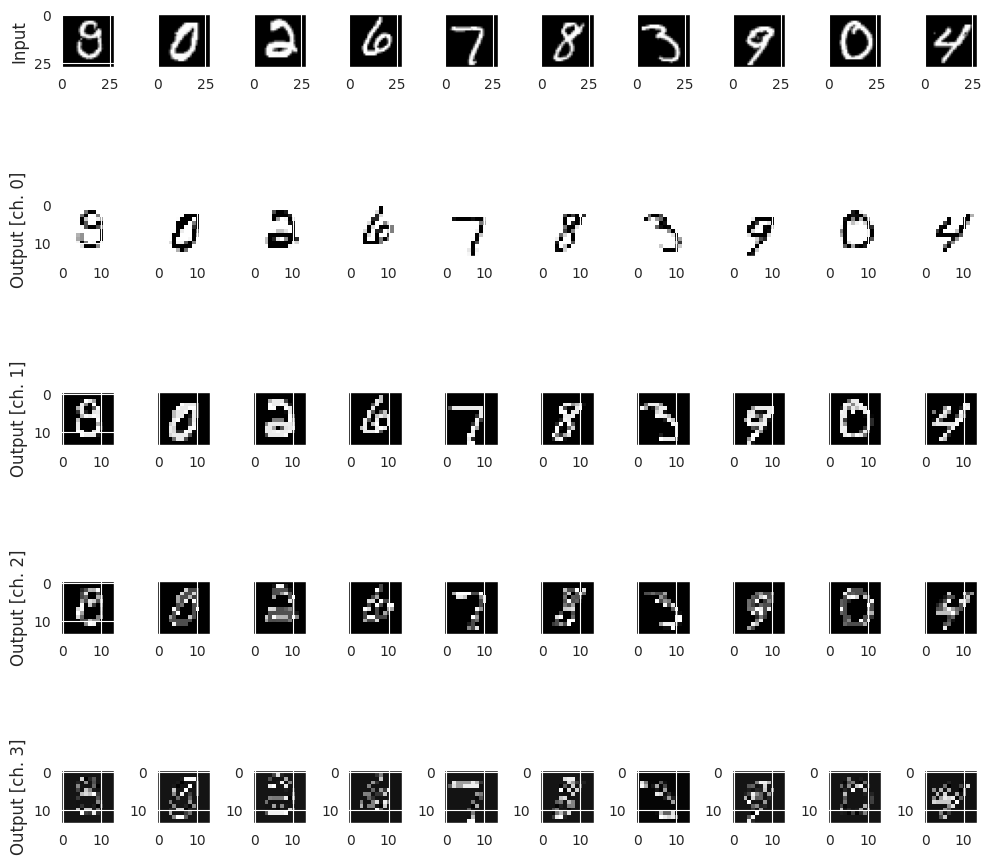

In [ ]:
n_samples = 10
n_channels = 4
start_index = 80  # Change this to select a different starting index

fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    image_index = start_index + k  # Calculate the index of the image to display

    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[image_index, :, :, 0], cmap="gray")  # Display the selected image

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel(f"Output [ch. {c}]")
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[image_index, :, :, c], cmap="gray")  # Display the corresponding output channels

plt.tight_layout()
plt.savefig(f'out_q_layer_{n_samples}_samples.png', dpi=300, facecolor='w')
plt.show()

**8. Defining the Classical Machine Learning Model**

In this section, we define the classical machine learning model that will be used to train on the quantum-convolved data. The model is built using Keras and consists of a simple feed-forward neural network.

1. Model Architecture: The model begins with a Flatten layer that reshapes the input data (a 2D image) into a 1D vector, which is required for fully connected layers. This is followed by a Dense layer with 10 units and a softmax activation function, which outputs the predicted class probabilities for the 10-digit MNIST classification task.

2. Compilation: The model is compiled using the Adam optimizer, which is an adaptive learning rate optimization algorithm. The sparse categorical crossentropy loss function is used, which is suitable for multi-class classification tasks where the labels are integers. The model is evaluated based on accuracy as the performance metric.

3. Returning the Model: The function returns the compiled Keras model, ready for training.

In [ ]:
def model():
    """Initializes and returns a Keras model to be trained"""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

**9. Training the Model with Custom Metrics**

In this section, we train the model using the quantum-convolved images (q_train_images) and their corresponding labels. Additionally, a custom callback is used to track and log additional metrics, such as precision, recall, and F1 score, during training.

1. Model Initialization: We initialize the Keras model using the previously defined model() function. This model is designed to classify the processed quantum images.

2. Custom Callback: A custom Keras callback, MetricsCallback, is created to compute additional performance metrics (precision, recall, and F1 score) at the end of each epoch. The callback uses the model's predictions on the validation data (q_test_images and test_labels) to calculate these metrics and add them to the logs, allowing for a more detailed evaluation during training.

3. Model Training: The fit method is called to train the model. During training:

  a. The q_train_images (quantum-convolved images) are used as input, and the train_labels are used as the target labels.

  b. The validation data (q_test_images and test_labels) is provided for monitoring the model's performance on unseen data.

  c. The batch size is set to 4, and training proceeds for a specified number of epochs (n_epochs).

  d. The custom callback is included in the training process to compute and log precision, recall, and F1 score after each epoch.

In [ ]:
q_model = model()

class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_pred = np.argmax(self.model.predict(self.validation_data[0]), axis=1)
        precision = precision_score(self.validation_data[1], y_pred, average='macro')
        recall = recall_score(self.validation_data[1], y_pred, average='macro')
        f1 = f1_score(self.validation_data[1], y_pred, average='macro')
        logs['val_precision'] = precision
        logs['val_recall'] = recall
        logs['val_f1_score'] = f1

q_history = q_model.fit(q_train_images, train_labels,
                        validation_data=(q_test_images, test_labels),
                        batch_size=4, epochs=n_epochs, verbose=2,
                        callbacks=[MetricsCallback((q_test_images, test_labels))])

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
25/25 - 1s - 55ms/step - accuracy: 0.1600 - loss: 2.4894 - val_accuracy: 0.3500 - val_loss: 2.0411 - val_precision: 0.3096 - val_recall: 0.2804 - val_f1_score: 0.2483
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 18ms/step - accuracy: 0.4200 - loss: 1.7397 - val_accuracy: 0.5000 - val_loss: 1.6667 - val_precision: 0.4187 - val_recall: 0.3957 - val_f1_score: 0.3648
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.7600 - loss: 1.2193 - val_accuracy: 0.6500 - val_loss: 1.4149 - val_precision: 0.5017 - val_recall: 0.5333 - val_f1_score: 0.4949
Epoch 4/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.8200 - loss: 0.9195 - val_accuracy: 0.7250 - val_loss: 1.2487 - val_precision: 0.6264 - val_recall: 0.6033 - val_f1_score: 0.5871
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 11ms/step - accuracy: 0.9000 - loss: 0.7188 - val_accuracy: 0.7250 - val_loss: 1.1361 - val_precision: 0.6264 - val_recall: 0.6033 - val_f1_score: 0.5871
Epoch 6/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.9500 - loss: 0.5794 - val_accuracy: 0.7500 - val_loss: 1.0565 - val_precision: 0.6467 - val_recall: 0.6200 - val_f1_score: 0.6054
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


25/25 - 0s - 8ms/step - accuracy: 0.9500 - loss: 0.4778 - val_accuracy: 0.8000 - val_loss: 0.9983 - val_precision: 0.7724 - val_recall: 0.6733 - val_f1_score: 0.6826
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.9500 - loss: 0.4003 - val_accuracy: 0.8000 - val_loss: 0.9539 - val_precision: 0.8415 - val_recall: 0.7481 - val_f1_score: 0.7510
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.9600 - loss: 0.3394 - val_accuracy: 0.7750 - val_loss: 0.9194 - val_precision: 0.8008 - val_recall: 0.7111 - val_f1_score: 0.7115
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 12ms/step - accuracy: 0.9800 - loss: 0.2905 - val_accuracy: 0.7750 - val_loss: 0.8921 - val_precision: 0.8008 - val_recall: 0.7111 - val_f1_score: 0.7115


**10. Training the Classical Model with Custom Metrics**

In this section, we train the classical neural network model using the original MNIST images (train_images) and their corresponding labels. Similar to the previous quantum model training, a custom callback is used to track additional metrics, such as precision, recall, and F1 score, during training.

1. Model Initialization: We initialize the classical model using the previously defined model() function. This model will be trained on the original MNIST images, as opposed to the quantum-convolved images used in the previous step.

2. Custom Callback: The same custom MetricsCallback is used as in the previous training process. This callback calculates precision, recall, and F1 score at the end of each epoch by comparing the model's predictions on the validation set (test_images and test_labels) with the true labels. These metrics are added to the logs and are useful for a more detailed evaluation.

3. Model Training: The fit method is called to train the classical model. The model is trained on the original MNIST dataset (train_images and train_labels) while using test_images and test_labels as the validation set.

  a. The batch size is set to 4, and the model is trained for a defined number of epochs (n_epochs).
  
  b. The custom callback is included to compute and log the precision, recall, and F1 score during training.

In [ ]:
c_model = model()

class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_pred = np.argmax(self.model.predict(self.validation_data[0]), axis=1)
        precision = precision_score(self.validation_data[1], y_pred, average='macro')
        recall = recall_score(self.validation_data[1], y_pred, average='macro')
        f1 = f1_score(self.validation_data[1], y_pred, average='macro')
        logs['val_precision'] = precision
        logs['val_recall'] = recall
        logs['val_f1_score'] = f1

c_history = c_model.fit(train_images, train_labels,
                        validation_data=(test_images, test_labels),
                        batch_size=4, epochs=n_epochs, verbose=2,
                        callbacks=[MetricsCallback((test_images, test_labels))])

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
25/25 - 1s - 49ms/step - accuracy: 0.2100 - loss: 2.2833 - val_accuracy: 0.3250 - val_loss: 2.0786 - val_precision: 0.3093 - val_recall: 0.3196 - val_f1_score: 0.2356
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
25/25 - 0s - 13ms/step - accuracy: 0.5500 - loss: 1.6688 - val_accuracy: 0.5250 - val_loss: 1.7484 - val_precision: 0.5426 - val_recall: 0.4894 - val_f1_score: 0.4264
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
25/25 - 0s - 10ms/step - accuracy: 0.8000 - loss: 1.2714 - val_accuracy: 0.6500 - val_loss: 1.5177 - val_precision: 0.7056 - val_recall: 0.6016 - val_f1_score: 0.5722
Epoch 4/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 10ms/step - accuracy: 0.8900 - loss: 0.9946 - val_accuracy: 0.6500 - val_loss: 1.3523 - val_precision: 0.6383 - val_recall: 0.5414 - val_f1_score: 0.5188
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
25/25 - 0s - 11ms/step - accuracy: 0.9300 - loss: 0.8009 - val_accuracy: 0.7750 - val_loss: 1.2322 - val_precision: 0.7566 - val_recall: 0.7111 - val_f1_score: 0.6858
Epoch 6/10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 16ms/step - accuracy: 0.9500 - loss: 0.6602 - val_accuracy: 0.8250 - val_loss: 1.1437 - val_precision: 0.9000 - val_recall: 0.7704 - val_f1_score: 0.7741
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
25/25 - 0s - 18ms/step - accuracy: 0.9500 - loss: 0.5541 - val_accuracy: 0.8250 - val_loss: 1.0775 - val_precision: 0.9000 - val_recall: 0.7704 - val_f1_score: 0.7741
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 7ms/step - accuracy: 0.9600 - loss: 0.4720 - val_accuracy: 0.8250 - val_loss: 1.0272 - val_precision: 0.8972 - val_recall: 0.7704 - val_f1_score: 0.7759
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
25/25 - 0s - 13ms/step - accuracy: 0.9600 - loss: 0.4069 - val_accuracy: 0.8250 - val_loss: 0.9883 - val_precision: 0.8972 - val_recall: 0.7704 - val_f1_score: 0.7759
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25/25 - 0s - 7ms/step - accuracy: 0.9600 - loss: 0.3543 - val_accuracy: 0.8250 - val_loss: 0.9578 

**11. Visualizing Model Performance Metrics**

In this section, we visualize the performance metrics (accuracy, loss, precision, and recall) of both the quantum and classical models during training. The plots help compare how the models perform with and without the quantum convolution layer across different epochs.

1. Plot Customization: We define a helper function plot_and_show() to plot the chosen metrics for both models. This function takes in the metric data from the quantum and classical model training histories (history_q and history_c), and plots them with appropriate labels, titles, and markers.

2. Metrics to Plot: We plot the following metrics for both models:

  a. Validation Accuracy: How well the model classifies the test data.

  b. Validation Loss: The loss value on the validation set, indicating how well the model is fitting the data.

  c. Validation Precision: The precision score for the validation set, which measures the proportion of true positive predictions out of all positive predictions.

  d. Validation Recall: The recall score for the validation set, which measures the proportion of true positive predictions out of all actual positive instances.

3. Creating Subplots: A 2x2 grid is created to display the four metrics side by side. Each subplot represents a different metric comparison between the quantum and classical models.

4. Layout and Saving: After plotting, we adjust the layout for better readability and save the figure as a high-resolution PNG file. Finally, the plots are displayed.

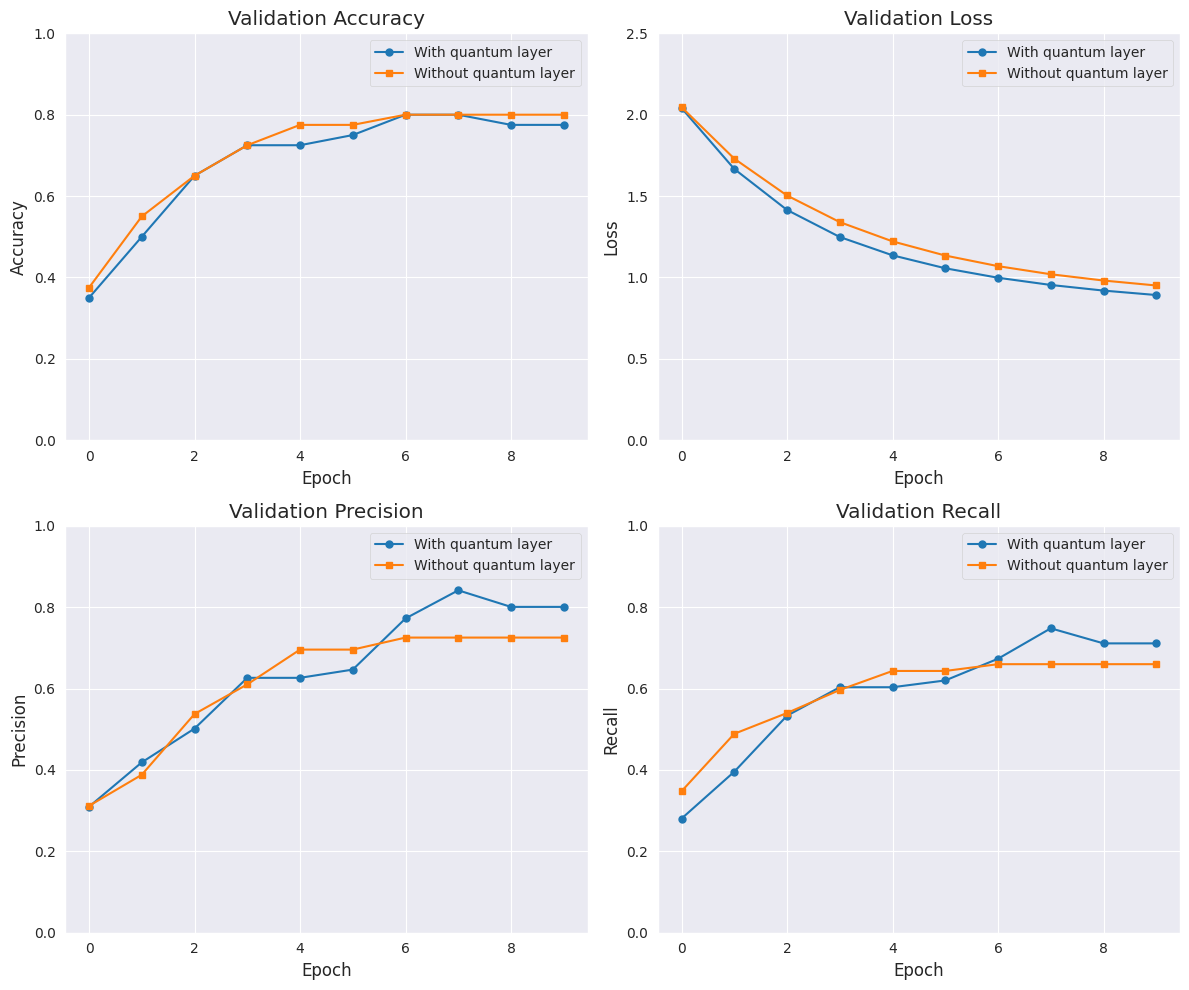

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e']
plt.style.use('ggplot')
sns.set_style("darkgrid")

def plot_and_show(ax, history_q, history_c, metric, title, ylabel, ylim=None):
    ax.plot(history_q, "-o", color=colors[0], label="With quantum layer", markersize=5)
    ax.plot(history_c, "-s", color=colors[1], label="Without quantum layer", markersize=5)
    ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([0, 1])
    ax.set_xlabel("Epoch")
    ax.legend()
    ax.set_title(title)

# Create a 2x2 grid for subplots (4 plots)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_and_show(axs[0, 0], q_history.history["val_accuracy"], c_history.history["val_accuracy"],
              "val_accuracy", "Validation Accuracy", "Accuracy")
plot_and_show(axs[0, 1], q_history.history["val_loss"], c_history.history["val_loss"],
              "val_loss", "Validation Loss", "Loss", ylim=[0, 2.5])
plot_and_show(axs[1, 0], q_history.history["val_precision"], c_history.history["val_precision"],
              "val_precision", "Validation Precision", "Precision")
plot_and_show(axs[1, 1], q_history.history["val_recall"], c_history.history["val_recall"],
              "val_recall", "Validation Recall", "Recall")

plt.tight_layout()

plt.savefig('metrics_plot.png', dpi=200, facecolor='w')
plt.show()

**12. Visualizing the F1 Score: Final Model Comparison**

In this final step, we visualize the F1 score for both the quantum-enhanced and classical models to evaluate their classification performance across epochs and at their peak. The F1 score is a comprehensive metric that balances precision and recall, making it a crucial measure for model performance, especially in imbalanced datasets.

1. Plotting F1 Score Across Epochs: The plot_f1_score() function is used to plot the F1 score over the training epochs for both the quantum and classical models. This allows us to observe how the models' F1 scores evolve during training and compare their effectiveness in correctly classifying the test data.

2. Plotting Maximum F1 Score: The plot_max_f1_score() function is used to visualize the maximum achieved F1 score during the entire training process for both models. This provides a quick comparison of the best performance reached by the quantum-enhanced model versus the classical model.

3. Analysis and Conclusion:

  a. The first plot shows the F1 score across epochs for both models, illustrating how each model improves over time.

  b. The second plot compares the maximum F1 scores achieved by each model. The highest value for each model is shown as a bar, with numerical labels for clarity.

4. By analyzing these plots, we can draw important conclusions about the impact of the quantum convolution layer. If the quantum-enhanced model shows a higher or more stable F1 score, it indicates that the quantum layer contributes positively to the model's ability to classify data correctly, thus improving performance over the classical model.

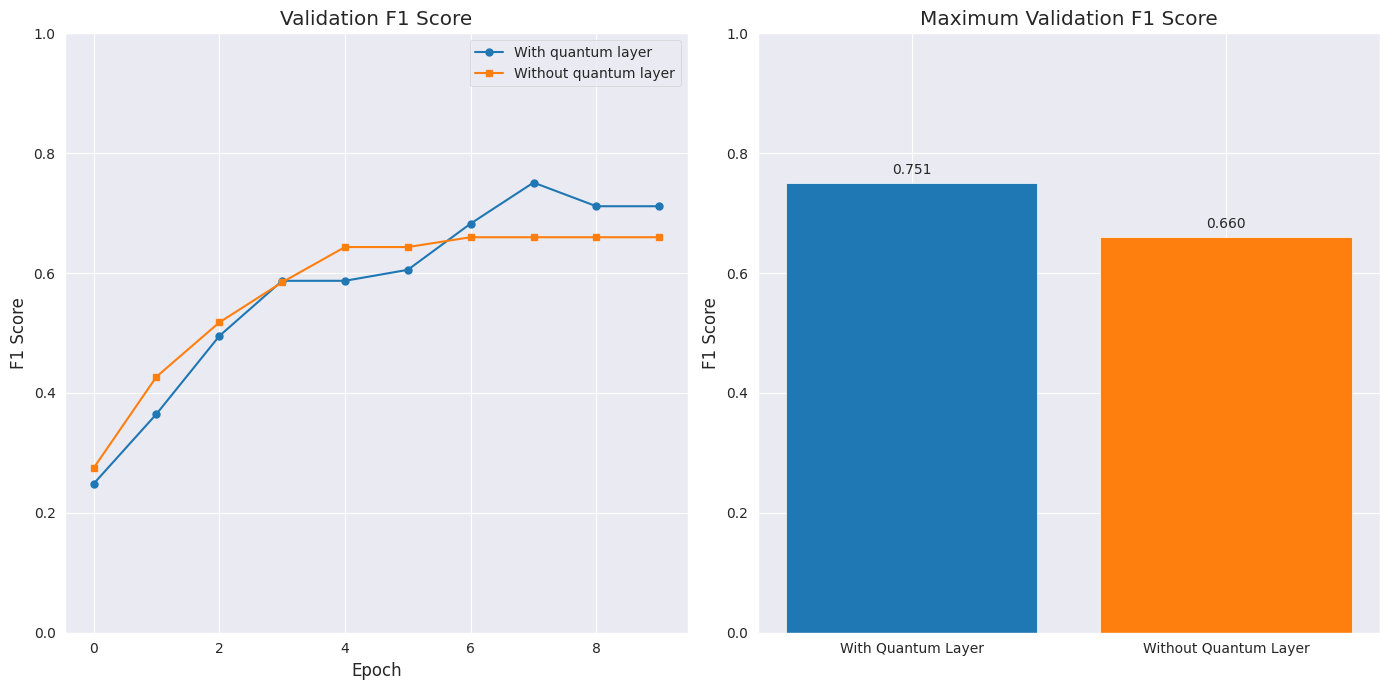

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = ['#1f77b4', '#ff7f0e']
plt.style.use('ggplot')
sns.set_style("darkgrid")

# Function to plot F1 score
def plot_f1_score(ax, history_q, history_c, title, ylabel, ylim=None):
    ax.plot(history_q, "-o", color=colors[0], label="With quantum layer", markersize=5)
    ax.plot(history_c, "-s", color=colors[1], label="Without quantum layer", markersize=5)
    ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([0, 1])
    ax.set_xlabel("Epoch")
    ax.legend()
    ax.set_title(title)

# Function to plot maximum F1 score as bars
def plot_max_f1_score(ax, history_q, history_c, title, xlabel, ylim=None):
    max_f1_q = np.max(history_q)
    max_f1_c = np.max(history_c)

    ax.bar(["With Quantum Layer", "Without Quantum Layer"], [max_f1_q, max_f1_c], color=colors)
    ax.set_ylabel(xlabel)
    ax.set_title(title)

    for i, v in enumerate([max_f1_q, max_f1_c]):
        ax.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom')

    if ylim is not None:
        ax.set_ylim(ylim)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

plot_f1_score(axs[0], q_history.history["val_f1_score"], c_history.history["val_f1_score"],
              "Validation F1 Score", "F1 Score")

plot_max_f1_score(axs[1], q_history.history["val_f1_score"], c_history.history["val_f1_score"],
                  "Maximum Validation F1 Score", "F1 Score",ylim=[0, 1])

plt.tight_layout()

plt.savefig('f1_score_plot.png', dpi=200, facecolor='w')

plt.show()